<h1 align="center"> Computation for Physicists </h1>
<h2 align="center"> <em>Initial Value Problems for ODE</em> </h2>
<h2 align="center" > <a href="mailto:duan@unm.edu">Dr. Duan</a> (UNM) </h2>

# Homework 12

- Use the following two methods to compute the integral $ \iint e^{-x y}\,\mathrm{d}x\mathrm{d}y $ with $x^2+y^2\leq 1$, $x\geq 0$, and $y\geq 0$.:
    - Use nested [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html),
    - Use [`scipy.integrate.dblquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html).

In [1]:
import numpy as np
from scipy.integrate import quad, dblquad

f_xy = lambda y, x: np.exp(-y * x) # integrand function of (x,y)
arc = lambda x: np.sqrt(1.0 - x**2) # upper bound on y for given x
f_x = lambda x: quad(f_xy, a=0, b=arc(x), args=(x,))[0] # integral over y 
quad(f_x, a=0, b=1) # integral over x

(0.6751670568500855, 2.6688429244359213e-11)

In [2]:
dblquad(f_xy, a=0, b=1, gfun=0.0, hfun=arc)

(0.6751670568500855, 2.6688429244359213e-11)

# Numerical Analysis
[Scientific Computing: An Introductory Survey](http://heath.cs.illinois.edu/scicomp/)

![Scientific Computing](http://heath.cs.illinois.edu/scicomp/images/CL80large.jpg)

# Ordinary Differential Equations

- An _ordindary didfferential equation (ODE)_ contains the derivatives of a single indepdent variable.

- The _order_ of an ODE is the highest-order derivative of the solution function that appears in the ODE.

- A high-order ODE $y^{(k)}(t) = f(t, y, y', y'', \ldots, y^{(k-1)})$ can be transformed into a system of first-order ODEs:
\begin{align}
u'_j(t) &= u_{j+1}(t)\quad(j=0,1,\ldots, k-2),\\
u'_{k-1}(t) &= f(t, u_0, \ldots, u_{k-1}), 
\end{align}
where $u_j(t) = y^{(j)}(t)$.

# Initial Value Problems

- There are infinite many functions that satisfy an ODE. An _initial value problem (IVP)_ uniquely determines the solution by its initial condition value(s).

- The solution to an IVP is
    - _stable_ - if the solutions resulting from perturbed initial values remain close to the original solution,
    - _asympototically stable_ - if the perturbed solutions converge back to the original solution,
    - _unstable_ - if the perturbed solutions diverge away from the original solution without bound.
   

- [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) can be used to solve IVPs.

In [3]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # make sharp images

- Example of stable solution: $y'(t) = 1$

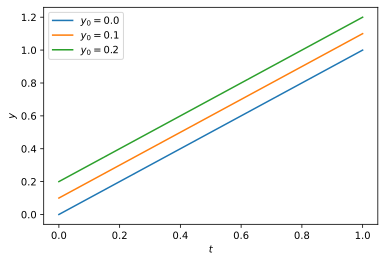

In [4]:
dydt = lambda t, y: np.ones_like(y) # derivative of y
t = np.linspace(0, 1, 100) # time points to store the solution
y0 = [0., .1, .2] # initial values

sol = solve_ivp(dydt, (t[0], t[-1]), y0, t_eval=t) 
assert sol.success, sol.message # check if the solution is found
for i in range(len(y0)):
    plt.plot(sol.t, sol.y[i], label=fr'$y_0={y0[i]}$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

- Example of asymptotically stable solution: $y'(t) = -y$

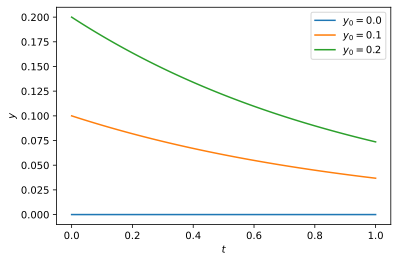

In [5]:
dydt = lambda t, y: -y # derivative of y

sol = solve_ivp(dydt, (t[0], t[-1]), y0, t_eval=t) 
assert sol.success, sol.message # check if the solution is found
for i in range(len(y0)):
    plt.plot(sol.t, sol.y[i], label=fr'$y_0={y0[i]}$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

- Example of unstable solution: $y'(t) = y$

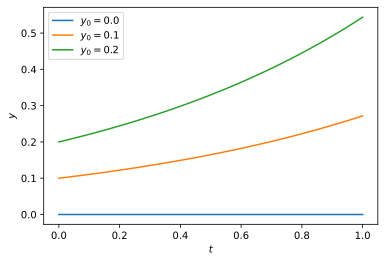

In [6]:
dydt = lambda t, y: y # derivative of y

sol = solve_ivp(dydt, (t[0], t[-1]), y0, t_eval=t) 
assert sol.success, sol.message # check if the solution is found
for i in range(len(y0)):
    plt.plot(sol.t, sol.y[i], label=fr'$y_0={y0[i]}$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

- Consider a linear, homogeneous system of ODEs 
$$ \mathbf{y}' = \mathbf{A} \mathbf{y}, $$
where $\mathbf{A}$ is a constant $n\times n$ matrix, and $\mathbf{y}(0)=\mathbf{y}_0$.

- Suppose $\mathbf{A}$ has $n$ eigenvalues $\lambda_i$ with eigenvectors $\mathbf{v}_i$, and $\mathbf{y}_0=\sum_i \alpha_i \mathbf{v}_i$. Then
$$ \mathbf{y}(t) = \sum_{i=0}^{n-1} \alpha_i \mathbf{v}_i e^{\lambda_i t}. $$
    - $\mathrm{Re}(\lambda_i)>0$: growing solution components;
    - $\mathrm{Re}(\lambda_i)<0$: decaying solution components;
    - $\mathrm{Re}(\lambda_i)=0$ and $\mathrm{Im}(\lambda_i)\neq 0$: oscillatory solution components.
    
- The Jacobian matrix $\mathbf{J}_\mathbf{f}(t, \mathbf{y}(t))$ determines the stability of a nonlinear system $\mathbf{y}'=\mathbf{f}(t, \mathbf{y}(t))$ locally. 

# Error and Accuracy


- The accuracy of an ODE solution is usually determined by the _truncation error_ (_discretization error_) due to the approximation method.

- _Global error_ $\mathbf{e}_k=\mathbf{y}_k-\mathbf{y}(t_k)$ is the difference between the computed solution and the true solution.

- _Local error_ $\boldsymbol{\ell}_k=\mathbf{y}_k-\mathbf{w}_{k-1}(t_k)$ is the difference between the computed solution $\mathbf{y}_k$ and the exact solution $\mathbf{w}_{k-1}(t)$ that passes through the previous point $(t_{k-1}, \mathbf{y}_{k-1})$.

- Global error is usually greater than the sum of local errors if the solution is unstable but may be less than the sum if the solution is stable.

- A numerical method has an _order of accuracy_ $p$ if $|\boldsymbol{\ell}_k|=\mathcal{O}(h_k^{p+1})$ which usually gives $|\mathbf{e}_k|=\mathcal{O}(h^p)$ for average step size $h$.

# Euler's Method

- From the Taylor series
$$ \mathbf{y}(t+h) = \mathbf{y}(t) + h \mathbf{y}'(t) + \frac{h^2}{2}\mathbf{y}''(t) + \cdots $$
one obtains the _Euler's method_:
$$ \mathbf{y}_{k+1} = \mathbf{y}_k + h_k\mathbf{f}(t_k, \mathbf{y}_k), $$
which is 1st order accurate,
where $t_k$ is the value of $t$ at step $k$, $\mathbf{y}_k$ is the computed value of $\mathbf{y}$ at $t_k$, and $h_k=t_{k+1}-t_k$ is the step size.

- Solving $y'=\lambda y$ with a fixed step size $h$, one obtains $y_k=(1+h\lambda)^k y_0$. Euler's method has a growth factor $g=1+h\lambda$ which amplifies the local error. Euler's method is stable (but not necessarily accurate) if $|g|<1$. 

- Euler's method is an _explicit method_ which depends only on previous steps.

# Backward Euler Method
- From the Taylor series one can also derive the _backward Euler method_:
$$ \mathbf{y}_{k+1} = \mathbf{y}_k + h_k \mathbf{f}(t_{k+1}, \mathbf{y}_{k+1}), $$
which is also 1st order accurate,
where $\mathbf{y}_{k+1}$ can be solved by, e.g. using a nonlinear equation solver.

- It is an _implicit method_ which depends on the value $\mathbf{y}_{k+1}$ to be solved.

- For $y'=\lambda y$, the backward Euler method has the growth factor $g=1/(1-h\lambda)$. The method is stable (but not necessarily accurate) as long as $\mathrm{Re}(\lambda)<0$ .

- Implicit methods are generally more stable than explicit methods and allow for larger step sizes.

# Trapezoid Method

- Combining Euler's method and the backward Euler one obtains the _trapezoid method_:
$$ \mathbf{y}_{k+1} = \mathbf{y}_k + \frac{h_k}{2}[\mathbf{f}(t_k, \mathbf{y}_k) + \mathbf{f}(t_{k+1}, \mathbf{y}_{k+1})], $$
which is implicit and 2nd order accurate.

- For $y'=\lambda y$ and step size $h$, the trapezoid method has the growth factor 
$$ g=\frac{1+h\lambda/2}{1-h\lambda/2}. $$ 
It is stable as long as $\mathrm{Re}(\lambda)<0$.

# Stiff Equations

- A _stiff ODE_ has components with disparate time scales or time scales smaller than the step sizes of the numerical methods.

- Implicit methods are more effective in solving stiff ODEs than explicit methods because they allow larger step sizes.

- Example: Solving $y'=-15 y$ with Euler's method and the trapezoid method (two-step Adams-Moulton) [[Wikipedia]](https://en.wikipedia.org/wiki/Stiff_equation).
![](https://upload.wikimedia.org/wikipedia/commons/d/df/StiffEquationNumericalSolvers.svg)

# Runge-Kutta Methods

- _Runge-Kutta methods_ are a group of explicit methods that simulate higher order derivates with multiple points within a step.

- _Heun's method_ is a two-stage, second-order Runge-Kutta method:
$$ \mathbf{y}_{j+1} = \mathbf{y}_j + \frac{h_j}{2}(\mathbf{k}_1 + \mathbf{k}_2), $$
where 
\begin{align}
\mathbf{k}_1 &=\mathbf{f}(t_j, \mathbf{k}_j), \\
\mathbf{k}_2 &=\mathbf{f}(t_j+h_j, \mathbf{y}_j+h_j \mathbf{k}_1).
\end{align}
Compared to the implicit trapezoid method, Heun's method uses the Euler prediction $\mathbf{y}_j+h_j \mathbf{k}_1$ in place of $\mathbf{y}(t_{j+1})$.

- The classical four-stage Runge-Kutta method (RK4) is similar to Simpson's rule:
$$ \mathbf{y}_{j+1} = \mathbf{y}_j + \frac{h_j}{6}(\mathbf{k}_1 + 2\mathbf{k}_2+ 2\mathbf{k}_3+ \mathbf{k}_4), $$
where 
\begin{align}
\mathbf{k}_1 &=\mathbf{f}(t_j, \mathbf{k}_j), \\
\mathbf{k}_2 &=\mathbf{f}(t_j+h_j/2, \mathbf{y}_j+(h_j/2) \mathbf{k}_1), \\
\mathbf{k}_3 &=\mathbf{f}(t_j+h_j/2, \mathbf{y}_j+(h_j/2) \mathbf{k}_2), \\
\mathbf{k}_4 &=\mathbf{f}(t_j+h_j, \mathbf{y}_j+h_j \mathbf{k}_3).
\end{align}


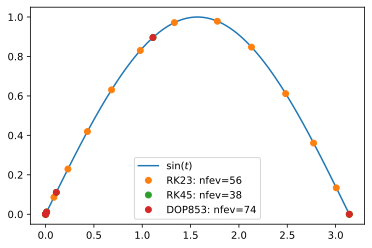

In [7]:
dydt = lambda t, y: np.cos([t])
methods = ['RK23', 'RK45', 'DOP853']

t = np.linspace(0, np.pi, 100)
plt.plot(t, np.sin(t), label='$\sin(t)$')
for m in methods:
    sol = solve_ivp(dydt, (0, np.pi), y0=[0], method=m)
    assert sol.success, sol.message # check if the solution is found
    plt.plot(sol.t, sol.y[0], 'o', label=f'{m}: nfev={sol.nfev}')
plt.legend()
plt.show()

# Multistep Methods

- _Multistep methods_ use the information at more than one previous point to compute the solution at the next point.

- _Linear multistep methods_ have the form:
$$ \mathbf{y}_{k+1} = \sum_{i=1}^m \alpha_i \mathbf{y}_{k+1-i}
+h \sum_{i=0}^m \beta_i \mathbf{f}(t_{k+1-i}, \mathbf{y}_{k+1-i}), $$
where $\alpha_i$ and $\beta_i$ are determined by polynomial interpolation.

- The method is explicit if $\beta_0=0$ and implicit if $\beta_0\neq 0$.

- The _Adams-Bashforth methods_ and the _Adams-Moulton methods_ are the explicit and implicit multistep methods both with $\alpha_1=1$ and $\alpha_{i\neq1}=0$.
    - Forcing $\mathbf{y}_{k+1}=\mathbf{y}_k+h(\beta_1\mathbf{y}'_k+\beta_2\mathbf{y}' _{k-1})$ to be accurate for any polynomial up to degree 2 gives the second-order, explicit Adams-Bashforth method with $\beta_1=3/2$ and $\beta_2=-1/2$.
    - Forcing $\mathbf{y}_{k+1}=\mathbf{y} _{k}+h(\beta_0\mathbf{y}' _{k+1}+\beta_1\mathbf{y}' _{k})$ to be accurate for any polynomial up to degree 2 gives the second-order, implicit Adams-Moulton method with $\beta_0=\beta_1=1/2$, which is also the trapezoid method.
  
- The _backward differentiation formulas (BDF)_ are implict multistep methods with $\beta_i=0$ except $\beta_0$.

- Multistep methods require more than one initial conditions.

- Implicit methods are more stable and better for stiff ODEs but need to be iterated to convergence.
   
- In a _predictor-corrector method_, $\mathbf{y}_{k+1}$ is computed with an explicit method (predictor) first and then improved by an implicit method (corrector).
    
- It is complicated to change the step size of a multistep method (a difficulty that can be solved by the _multivalue methods_).

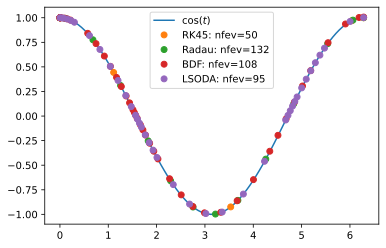

In [8]:
dydt = lambda t, y: -np.sin([t])
methods = ['RK45', 'Radau', 'BDF', 'LSODA']
t = np.linspace(0, 2*np.pi, 100)
plt.plot(t, np.cos(t), label='$\cos(t)$')
for m in methods:
    sol = solve_ivp(dydt, (0, 2*np.pi), y0=[1], method=m)
    assert sol.success, sol.message
    plt.plot(sol.t, sol.y[0], 'o', label=f'{m}: nfev={sol.nfev}')
plt.legend()
plt.show()

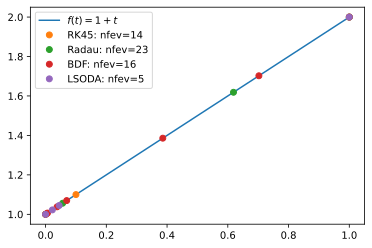

In [10]:
f = lambda t, c: 1.0 + t + c*np.exp(-100.0*t)
dydt = lambda t, y: -100.0*y + 100.0*t + 101.0

t = np.linspace(0, 1, 100)
plt.plot(t, f(t,0), label='$f(t)=1+t$')
for m in methods:
    sol = solve_ivp(dydt, (0, 1), y0=[1], method=m)
    assert sol.success, sol.message
    plt.plot(sol.t, sol.y[0], 'o', label=f'{m}: nfev={sol.nfev}')
plt.legend()
plt.show()

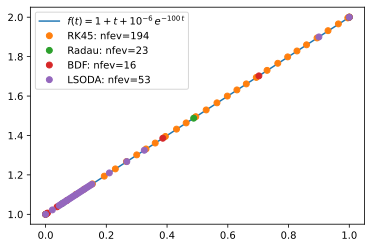

In [11]:
plt.plot(t, f(t, 1e-6), label='$f(t)=1+t+10^{-6}\,e^{-100\,t}$')
for m in methods:
    sol = solve_ivp(dydt, (0, 1), y0=[1+1e-6], method=m)
    assert sol.success, sol.message
    plt.plot(sol.t, sol.y[0], 'o', label=f'{m}: nfev={sol.nfev}')
plt.legend()
plt.show()

# Homework 13

The equation of motion for a magnetic dipole $\mathbf{m}$ in the presence of a magnetic field $\mathbf{B}$ is:
$$ \frac{\mathrm{d}\mathbf{m}}{\mathrm{d} t} = \gamma \mathbf{m}\times\mathbf{B}, $$
where the constant $\gamma$ is called the gyromagnetic ratio. Write a function or class that can compute $\mathbf{m}(t)$ at any time $t>0$ for given $\gamma$, $\mathbf{B}(t)$, and $\mathbf{m}(t=0)$.